<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem description</a></span></li></ul></div>

# Cyclical features

## Intro

Working on an anomaly detection project I was looking for new creative ways to transform date fields into sensible distances when I bumped into a blog: http://blog.davidkaleko.com/feature-engineering-cyclical-features.html. It triggered me to investigate:

> "Hours of the day, days of the week, months in a year, and wind direction are all examples of features that are cyclical. Many new machine learning engineers don’t think to convert these features into a representation that can preserve information such as hour 23 and hour 0 being close to each other and not far."
(https://medium.com/ai³-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db)

Hour of the day, day of the week etc. are not frequently used features. Typically they would appear in some capacity planning related issues: predicting webtraffic, orderpicking personel or trafficjams. In frequently used Machine learning datasets it appears in the Bikesharing dataset (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). But never the cyclical nature of the hour of the day is considered.

This quick write up addresses:

1. Problem description
2. Simple model
3. Conclusion
4. Attempt to visualize

## Problem description

In [57]:
#create data

import numpy as np
import pandas as pd


data = {'hr': [1,2,3,4,5,6,7,8,9,10,11,12], 'mnth': [1,2,3,4,5,6,7,8,9,10,11,12]}

df = pd.DataFrame(data)
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

In [58]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [59]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [60]:
df

,hr,hr_sin,hr_cos
0,1,2.588190e-01,9.659258e-01
1,2,5.000000e-01,8.660254e-01
2,3,7.071068e-01,7.071068e-01
3,4,8.660254e-01,5.000000e-01
4,5,9.659258e-01,2.588190e-01
5,6,1.000000e+00,6.123234e-17
6,7,9.659258e-01,-2.588190e-01
7,8,8.660254e-01,-5.000000e-01
8,9,7.071068e-01,-7.071068e-01
9,10,5.000000e-01,-8.660254e-01


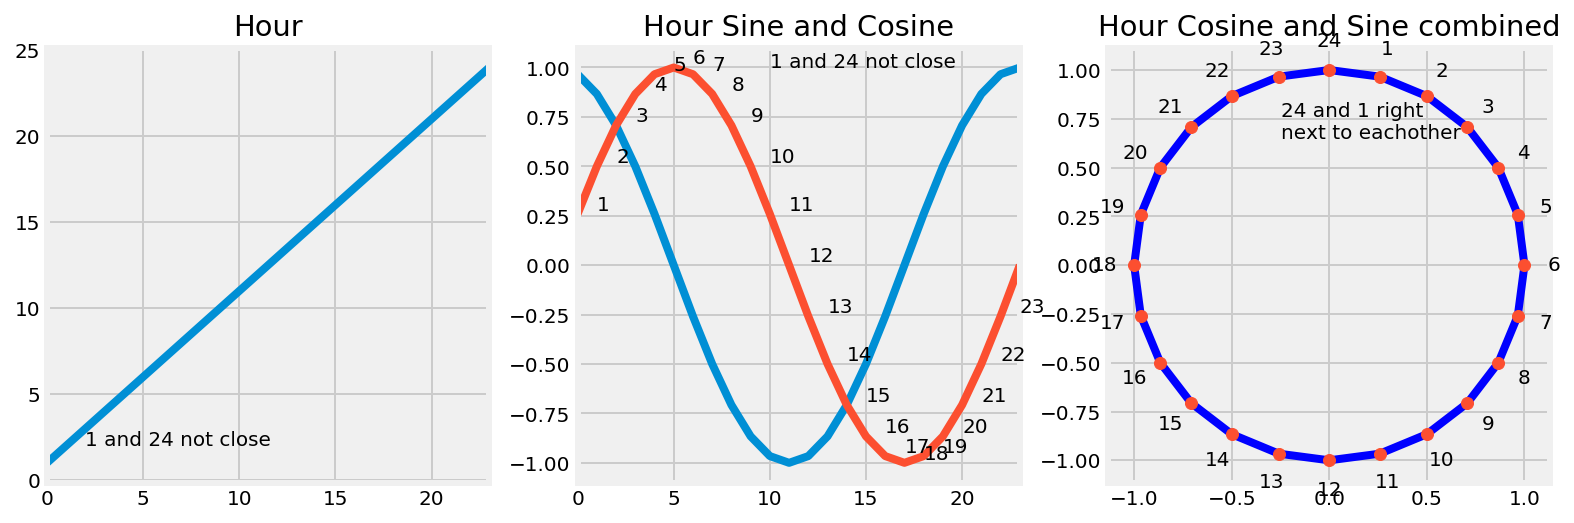

In [260]:

#Vizualize the problem


fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize=(12,4))
plt.axis('equal')

df.hr.plot(ax=ax1)
df.hr_cos.plot(ax=ax2)
df.hr_sin.plot(ax=ax2)
ax3.fill(df['hr_sin'],df['hr_cos'], lw=4, ec = 'blue', fill=False, zorder=1)
ax3.scatter(df['hr_sin'],df['hr_cos'], zorder=2)

df.hr.plot(ax=ax4)

for i, txt in enumerate(hr):
    ax3.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')

for i, txt in enumerate(hr):
    ax2.annotate(txt, ((df['hr'][i]), df['hr_sin'][i]),
            horizontalalignment='left',
            verticalalignment='bottom')

ax1.set_title('Hour')
ax1.text(2,2,'1 and 24 not close')
ax2.set_title('Hour Sine and Cosine')
ax2.text(10,1,'1 and 24 not close')
ax3.set_title('Hour Cosine and Sine combined')
ax3.text(-.25,.65, '24 and 1 right \nnext to eachother');

In [395]:
for i in range(1,24,2):
    print(np.array(np.linspace(15,360,24))[i])
    print(df['hr_sin'][i],df['hr_cos'][i])

30.0
0.49999999999999994 0.8660254037844387
60.0
0.8660254037844386 0.5000000000000001
90.0
1.0 6.123233995736766e-17
120.0
0.8660254037844388 -0.4999999999999998
150.0
0.5000000000000003 -0.8660254037844385
180.0
1.2246467991473532e-16 -1.0
210.0
-0.4999999999999998 -0.8660254037844388
240.0
-0.8660254037844384 -0.5000000000000004
270.0
-1.0 -1.8369701987210297e-16
300.0
-0.866025403784439 0.4999999999999993
330.0
-0.5000000000000004 0.8660254037844384
360.0
-2.4492935982947064e-16 1.0


In [145]:
!ls CookBooks/Sources/

AdaBoostPicture.png       README.md                 image.png
DataScienceDefCricl.png   ShapeFiles                meme-books.png
DeWitteJuffer.csv         aurelien.jpeg             newton-right.jpg
MarkChainGraph.png        boosted-trees-process.png turnover.xlsx
MarkChainTransMatr.png    ga-natural-selection.png


In [210]:
path = '/Users/maartenk/Documents/git/CookBooks/Sources/'
file = 'turnover.xlsx'


In [211]:
df = pd.read_excel(path+file)

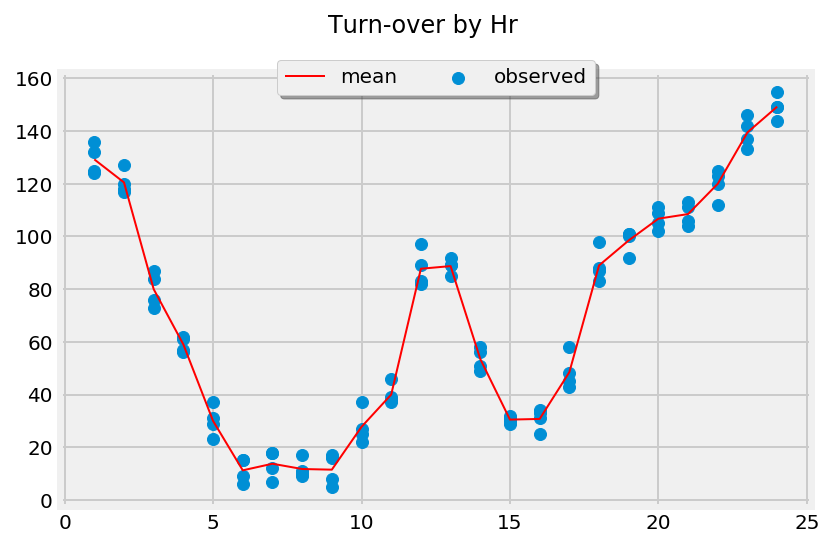

In [212]:
fig, ax = plt.subplots()
ax.scatter(df['hr'], df['turnover'], label='observed')
ax.plot(df.groupby(by = df['hr']).mean(), lw=1, c='r', label='mean')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
fig.suptitle('Turn-over by Hr')
plt.show()

In [213]:
import seaborn as sns

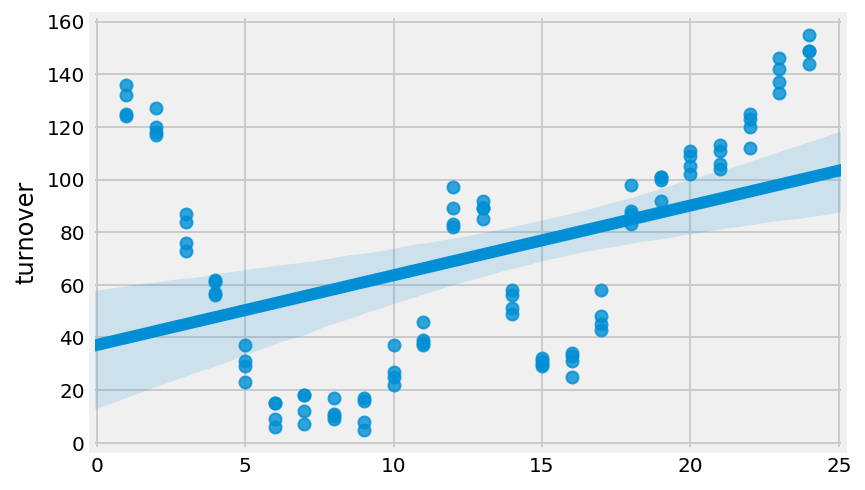

In [214]:
sns.regplot(df[['hr']], df['turnover']);

In [215]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr']], df[['turnover']])
model.score(df[['hr']], df[['turnover']])

0.1733796432227398

In [216]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
model = LinearRegression()

model.fit(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))
model.score(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))

0.17337964322273972

In [217]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [218]:
df.columns

Index(['hr', 'turnover', 'hr_sin', 'hr_cos'], dtype='object')

In [219]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr_sin', 'hr_cos']], df[['turnover']])
model.score(df[['hr_sin', 'hr_cos']], df[['turnover']])

0.635885836759986

In [220]:
X = pd.get_dummies(df['hr'])

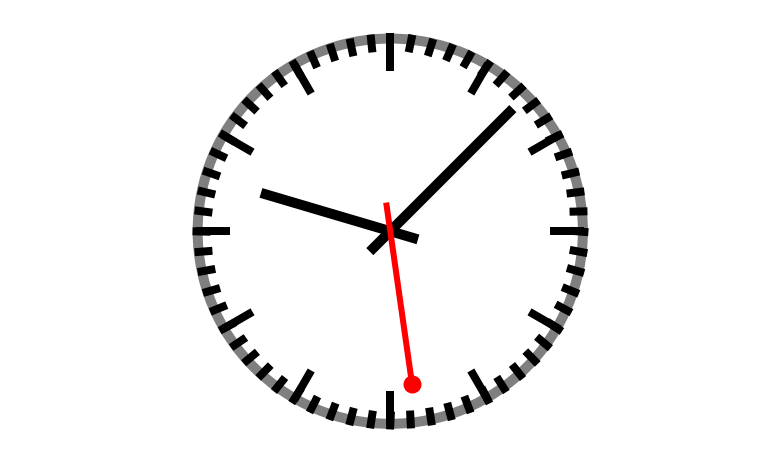

In [246]:
import matplotlib.pyplot as plt
import matplotlib as mlp

fig, ax = plt.subplots()

ax.add_patch(plt.Circle((0, 0), 1, fill=None, ec='black',lw=5, alpha=0.5))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.92), (a2*.92), marker=t, s=300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(6,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=80, c='k')
    
# for i, txt in enumerate(hr):
#     plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
#             horizontalalignment='center',
#             verticalalignment='center')

ax.plot((df['hr_sin'][2]*.9, df['hr_sin'][2]*-.15),(df['hr_cos'][2]*.9, df['hr_cos'][2]*-.15), lw =5, c='black')
# # ax.plot((np.sin(5)*.7,(np.sin(5)*-.2),(np.cos(5)*.7),(np.cos(5)*-.2), lw =5, c='black')
ax.plot((np.sin(5)*.7,np.sin(5)*-.15),(np.cos(5)*.7,np.cos(5)*-.15), lw =5, c='black')
ax.plot((np.sin(3)*.8, np.sin(3)*-.15),(np.cos(3)*.8,np.cos(3)*-.15), lw =3, marker='o',c='red', markevery=-1, markersize=8)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()

In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, df[['turnover']])
model.score(X, df[['turnover']])

0.9898820731294891

In [222]:
X.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [242]:
radiusratio = df['turnover'].groupby(by = df['hr']).mean()\
/df['turnover'].groupby(by = df['hr']).sum().sum()

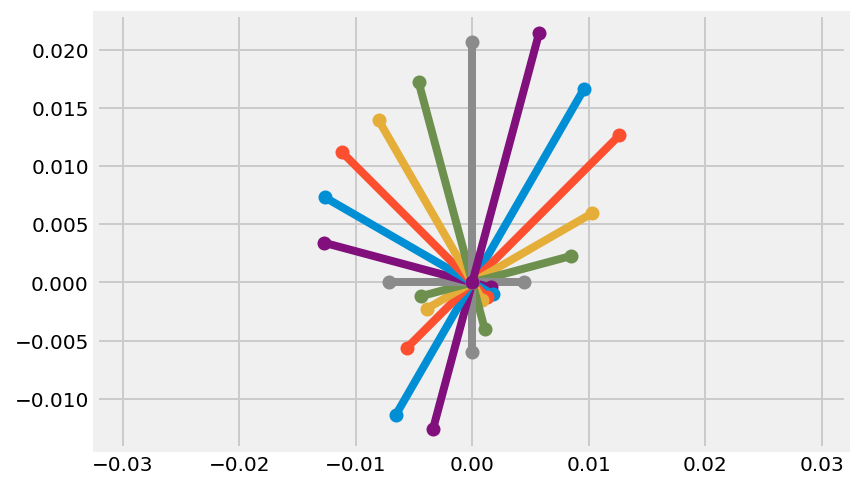

In [251]:
plt.axis('equal')
for i in range(1,25):
    plt.plot((df['hr_sin'][i]*radiusratio[i],0), (df['hr_cos'][i]*radiusratio[i],0), marker='o')
#     plt.plot(df['hr_sin'][i]*radiusratio[i],
#              df['hr_cos'][i]*radiusratio[i], marker='x')

In [281]:

hrcycle = [] 
for i in range(1,25):
    hrcycle.append(i)
hrcycle.append(1)
    

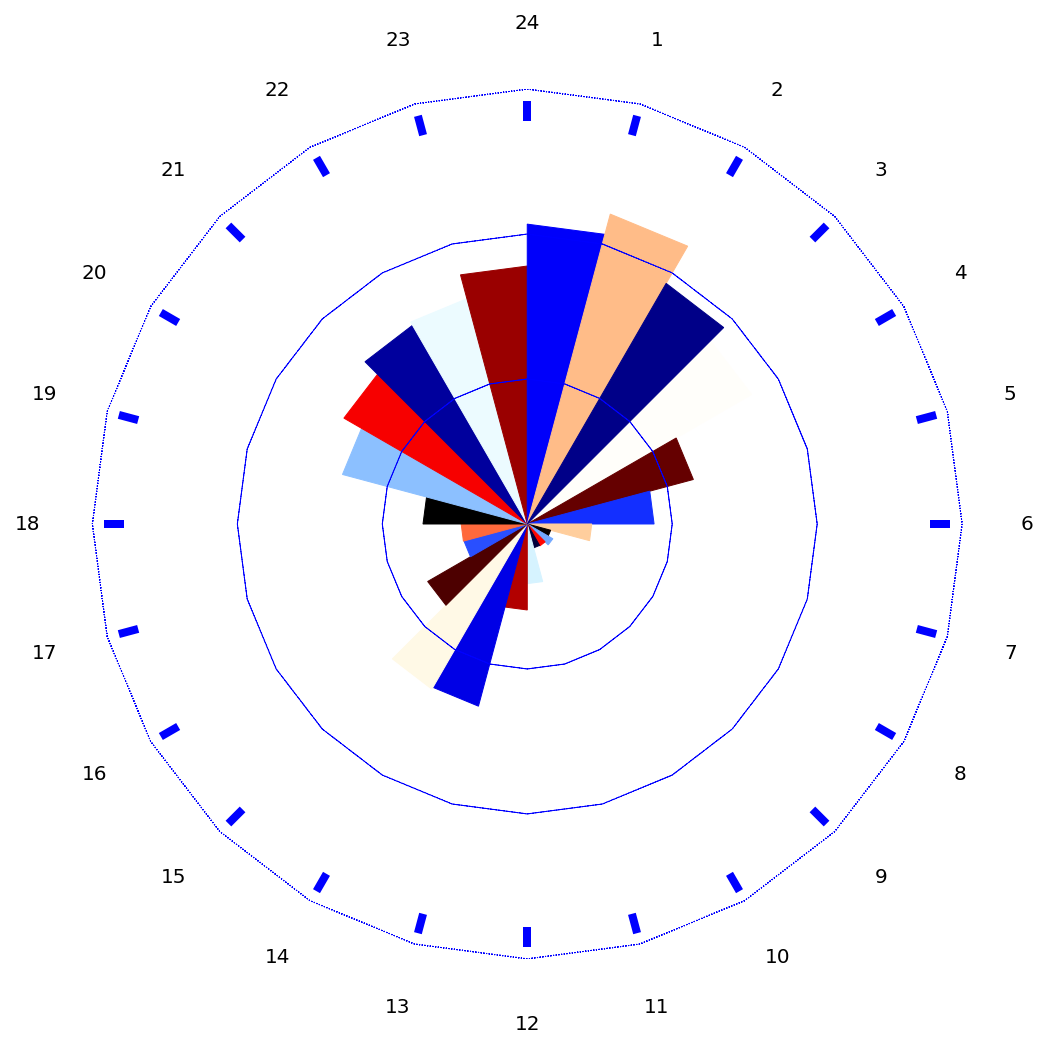

In [445]:
cmap=plt.get_cmap("flag")
plt.figure(figsize=(8,8))

plt.axis('equal')
for i in hrcycle[1:25]:
    t1 = plt.Polygon(((df['hr_sin'][hrcycle[i-1]]*radiusratio[i],\
                       df['hr_cos'][hrcycle[i-1]]*radiusratio[i]),\
                      (df['hr_sin'][hrcycle[i]]*radiusratio[i],\
                       df['hr_cos'][hrcycle[i]]*radiusratio[i]),\
                      (0,0)), color=cmap(float(i)/len(hrcycle)))
    plt.gca().add_patch(t1)
    
plt.xlim(-.03,.03)
plt.ylim(-.03, .03)
plt.fill(df['hr_sin']*.01,df['hr_cos']*.01, lw=.5, ec='b',linestyle=':', fill=False, zorder=1)
plt.fill(df['hr_sin']*.02,df['hr_cos']*.02, lw=.5, ec='b',linestyle=':', fill=False, zorder=1)
plt.fill(df['hr_sin']*.03,df['hr_cos']*.03, lw=.51, ec='b',linestyle=':', fill=False, zorder=1)



for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i]*.03,df['hr_cos'][i]*.03)
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=100, c='b')
    
for i, txt in enumerate(hr):
    plt.annotate(txt, (df['hr_sin'][i]*.03, df['hr_cos'][i]*.03), (df['hr_sin'][i]*1.15*.03, df['hr_cos'][i]*1.15*.03),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')
plt.axis(False)
plt.show()
# https://stackoverflow.com/questions/49098333/picking-plot-colors-from-matplotlib-colorbar

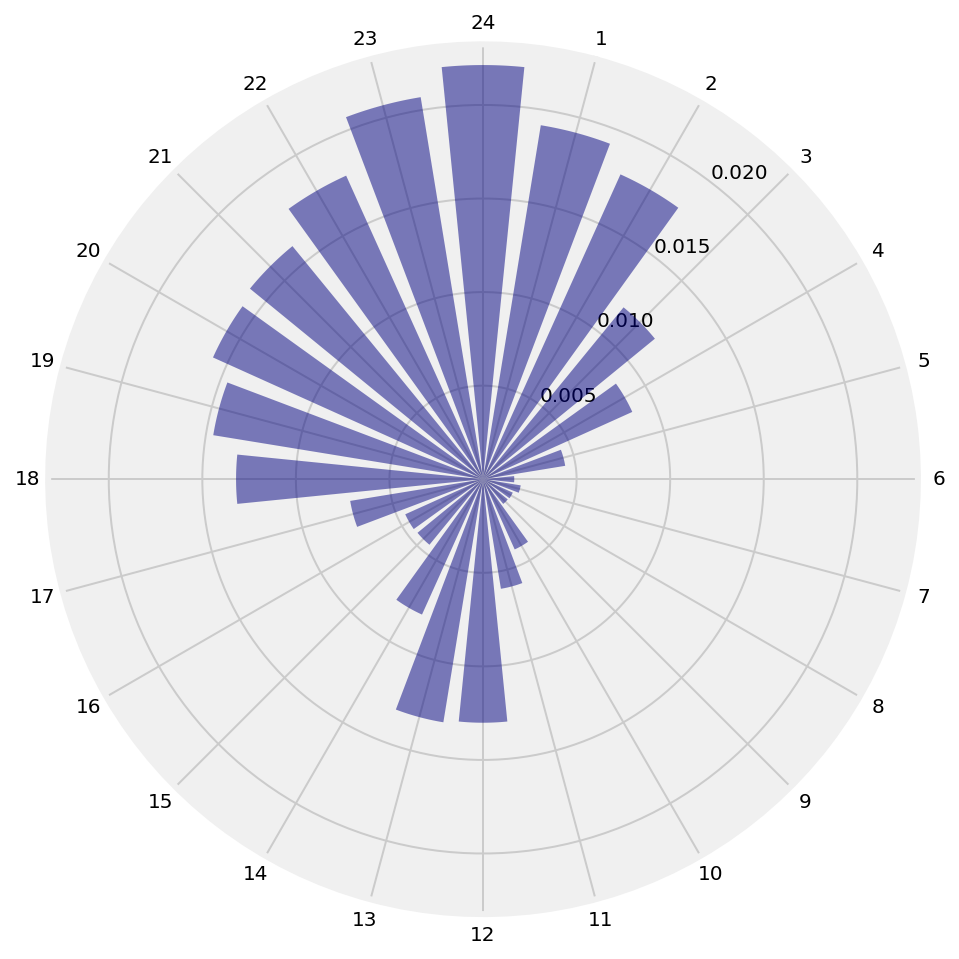

In [456]:
###### import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

plt.gca().set_prop_cycle(None)
plt.get_cmap("jet")
sample = radiusratio#np.random.uniform(low=0.5, high=13.3, size=(15,))
N = len(sample)

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# bars = ax.bar(theta, sample, width=0.4)
bars = ax.bar(theta, sample, width=0.2, bottom=0.0)
for r,bar in zip(sample, bars):
    bar.set_facecolor(cm.jet(r/len(sample)))
    bar.set_alpha(0.5)

ax.set_theta_zero_location('N', offset=345)
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(range(1, len(theta)+1))
ax.yaxis.grid(True)

plt.show()

In [363]:
np.arange(0, 2*np.pi, 2*np.pi/N)
# len(sample)

array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
       1.30899694, 1.57079633, 1.83259571, 2.0943951 , 2.35619449,
       2.61799388, 2.87979327, 3.14159265, 3.40339204, 3.66519143,
       3.92699082, 4.1887902 , 4.45058959, 4.71238898, 4.97418837,
       5.23598776, 5.49778714, 5.75958653, 6.02138592])

In [365]:
np.linspace(0, 2*np.pi, 24)

array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334, 6.28318531])

https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation

In [302]:
#import colormap
from matplotlib import cm
import matplotlib

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.jet(norm(400),bytes=True) 

#400 is one of value between 0 and 1000

In [303]:
rgba_color

(41, 255, 205, 255)

In [348]:
df_ = pd.DataFrame()
for i in range(10):
    df_['col0i'+f'{i}']=[i]
    
df_.head()
    

,col0i0,col0i1,col0i2,col0i3,col0i4,col0i5,col0i6,col0i7,col0i8,col0i9
0,0,1,2,3,4,5,6,7,8,9


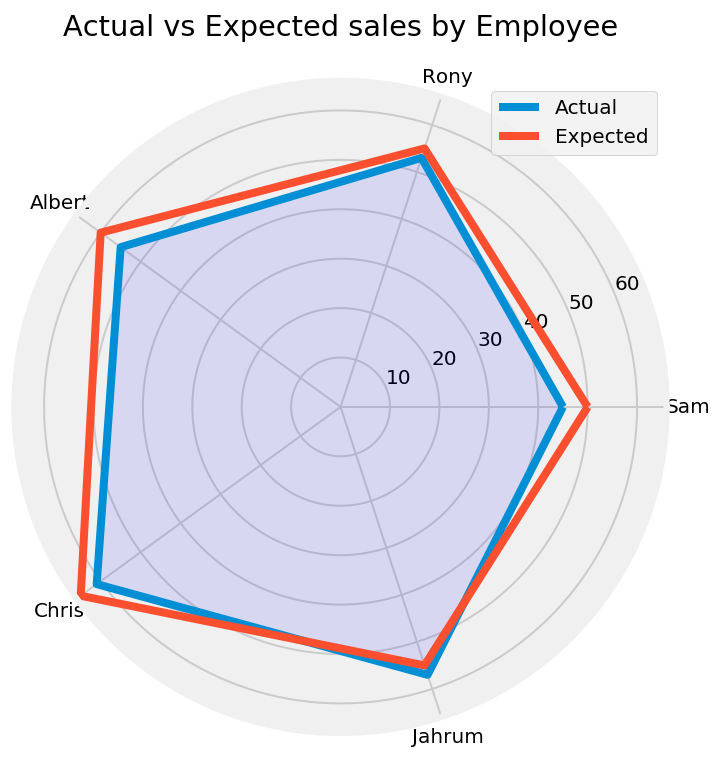

In [429]:
import matplotlib.pyplot as plt
import numpy as np
 
employee = ["Sam", "Rony", "Albert", "Chris", "Jahrum"]
actual = [45, 53, 55, 61, 57, 45]
expected = [50, 55, 60, 65, 55, 50]
 
# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(10, 6))
plt.subplot(polar=True)
 
theta = np.linspace(0, 2 * np.pi, len(actual))
 
# Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(employee))), (employee))
 
# Plot actual sales graph
plt.plot(theta, actual)
plt.fill(theta, actual, 'b', alpha=0.1)
 
# Plot expected sales graph
plt.plot(theta, expected)
 
# Add legend and title for the plot
plt.legend(labels=('Actual', 'Expected'), loc=1)
plt.title("Actual vs Expected sales by Employee")
 
# Dsiplay the plot on the screen
plt.show()

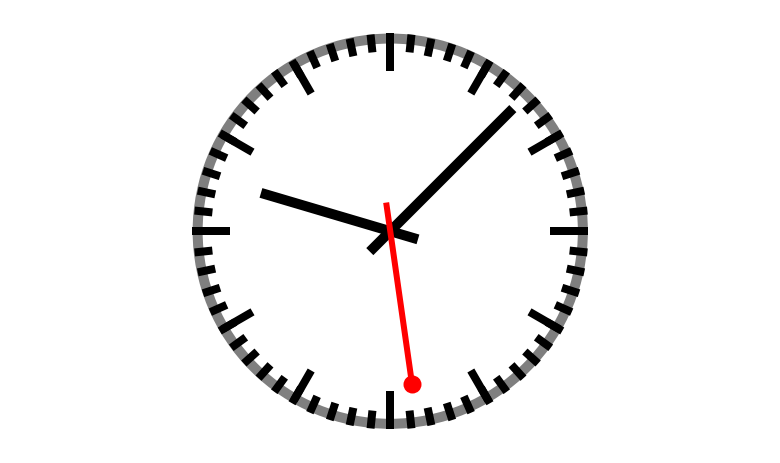

In [263]:
import matplotlib.pyplot as plt
import matplotlib as mlp

fig, ax = plt.subplots()

ax.add_patch(plt.Circle((0, 0), 1, fill=None, ec='black',lw=5, alpha=0.5))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.92), (a2*.92), marker=t, s=300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=80, c='k')
    
# for i, txt in enumerate(hr):
#     plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
#             horizontalalignment='center',
#             verticalalignment='center')

ax.plot((df['hr_sin'][2]*.9, df['hr_sin'][2]*-.15),(df['hr_cos'][2]*.9, df['hr_cos'][2]*-.15), lw =5, c='black')
# # ax.plot((np.sin(5)*.7,(np.sin(5)*-.2),(np.cos(5)*.7),(np.cos(5)*-.2), lw =5, c='black')
ax.plot((np.sin(5)*.7,np.sin(5)*-.15),(np.cos(5)*.7,np.cos(5)*-.15), lw =5, c='black')
ax.plot((np.sin(3)*.8, np.sin(3)*-.15),(np.cos(3)*.8,np.cos(3)*-.15), lw =3, marker='o',c='red', markevery=-1, markersize=8)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()